# US Startup Dataset

#### We will use this dataset to build a **Multiple Linear Regression model** that predicts Profit based on the given features.

## Import Libraries

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

### Load CSV file as Dataframe

In [3]:
df = pd.read_csv("C:\\Users\\admin\\OneDrive\\Documents\\GitHub\\AI-Course\\ml-projects\\us-startup-dataset\\50_Startups (1).csv")

#### Check first 5 rows

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### Check Shape

In [5]:
df.shape

(50, 5)

#### Check Dataset info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


#### Check Summary

In [9]:
pd.options.display.float_format = '{:,.0f}'.format
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50,50,50,50
mean,"73,722","121,345","211,025","112,013"
std,"45,902","28,018","122,290","40,306"
min,0,"51,283",0,"14,681"
25%,"39,936","103,731","129,300","90,139"
50%,"73,051","122,700","212,716","107,978"
75%,"101,603","144,842","299,469","139,766"
max,"165,349","182,646","471,784","192,262"


## Exploratory Data Analysis (EDA)

#### WE'll check correlation and visualize key relationships

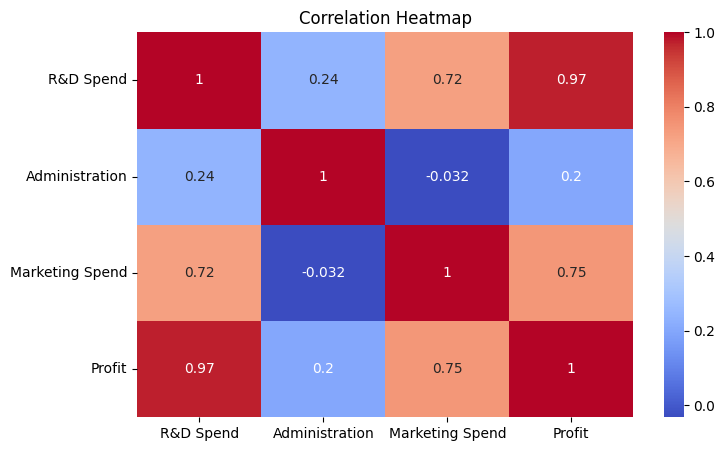

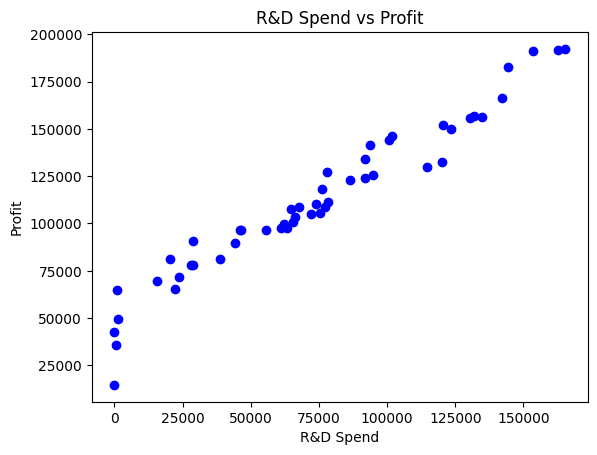

In [10]:
# Correlation heatmap
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# R&D Spend vs Profit
plt.scatter(df["R&D Spend"], df["Profit"], color="blue")
plt.xlabel("R&D Spend")
plt.ylabel("Profit")
plt.title("R&D Spend vs Profit")
plt.show()

## Features and Target

- Independent Variables (X): R&D Spend, Administration, Marketing Spend, State  
- Dependent Variable (y): Profit  
- We will one-hot encode the categorical feature "State"

In [11]:
X = df.drop("Profit", axis=1)   
y = df["Profit"]               

# One-hot encoding
X = pd.get_dummies(X, drop_first=True)

print("Encoded Features:", X.columns.tolist())

Encoded Features: ['R&D Spend', 'Administration', 'Marketing Spend', 'State_Florida', 'State_New York']


##  Train-Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Train Linear Regression Model

In [15]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## Predictions & Model Evaluation

In [16]:
y_pred = regressor.predict(X_test)

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("\n--- Model Evaluation ---")
print("R² Score:", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


--- Model Evaluation ---
R² Score: 0.8987266414328636
Mean Absolute Error (MAE): 6961.477813252382
Mean Squared Error (MSE): 82010363.04430111
Root Mean Squared Error (RMSE): 9055.957323458471


## Feature Importance


--- Feature Importance ---


,Feature,Coefficient,Abs_Coefficient
3,State_Florida,939,939
4,State_New York,7,7
0,R&D Spend,1,1
1,Administration,-0,0
2,Marketing Spend,0,0


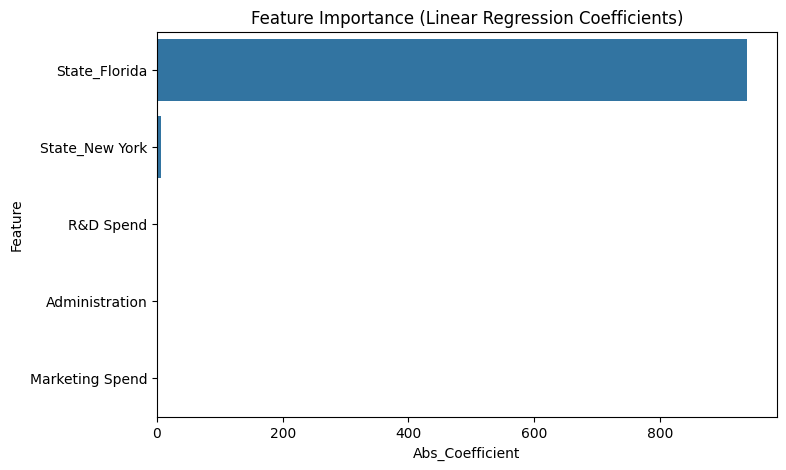

In [19]:
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": regressor.coef_
})
feature_importance["Abs_Coefficient"] = feature_importance["Coefficient"].abs()
feature_importance = feature_importance.sort_values(by="Abs_Coefficient", ascending=False)

print("\n--- Feature Importance ---")
display(feature_importance)

# Plot
plt.figure(figsize=(8,5))
sns.barplot(data=feature_importance, x="Abs_Coefficient", y="Feature")
plt.title("Feature Importance (Linear Regression Coefficients)")
plt.show()


### Insight

- R&D Spend is the only major factor driving profit
- Administration and Marketing Spend barely matter
- Location (State) has a very small influence